<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/VectorModelsAndTextProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stemming and Lemmatization

* Stemming: It cuts the word simply to try to get the root word
* Lemmatization: Its a dict to map words to its base word (more complex and sofistication)

In [1]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

In [2]:
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer('english')

In [3]:
poter_stem = porter.stem('running')
print(poter_stem)
lancaster_stem = lancaster.stem('bosses')
print(lancaster_stem)
snowball_stem = snowball.stem('ran') # stemming is not get the right base word in this case
print(snowball_stem)

run
boss
ran


In [4]:
sentence = "Lemmatization is more sophisticated than stemming".split()
for word in sentence:
    print(porter.stem(word), end=" ") # see the outcome

lemmat is more sophist than stem 

# Looking at Lemmatization

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
nltk.download('wordnet') # import / download the dictionary to map the words

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from nltk.corpus import wordnet

In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
lemmatizer.lemmatize("walking")

'walking'

In [10]:
lemmatizer.lemmatize("walking", pos=wordnet.VERB)

'walk'

In [11]:
lemmatizer.lemmatize("going")

'going'

In [12]:
lemmatizer.lemmatize("going", pos=wordnet.VERB)

'go'

In [13]:
lemmatizer.lemmatize("better", pos=wordnet.ADJ)

'good'

# Mapping the right pos

In [14]:
# Define a mapping from NLTK POS tags to WordNet POS
def get_wordnet_pos(treebank_tag):
    #print(f"Tag: {treebank_tag}")
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if tag is not found

In [15]:
nltk.download('averaged_perceptron_tagger_eng') # get the package

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [16]:
sentence = "Donald Trump has a devoted following".split()

In [17]:
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[('Donald', 'NNP'),
 ('Trump', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [18]:
for word, tag in words_and_tags:
    lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
    print(lemma, end=" ")


Donald Trump have a devote following 

# Count Vectorizer

* We use sklearn for making the ml here
* we use a bbc data set for classification, eaxh data has only 1 lable
* we vill use diferent methods to augment tha data, like semming lemmenting, tokenising.. etc. To see how it efect the model performance



In [19]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

In [20]:
# Download maps
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
# get some simple data that has only 2 fields and 1 lable / text
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-12-19 09:30:50--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.07s   

2024-12-19 09:30:51 (65.5 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [22]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [23]:
inputs = df['text']
labels = df['labels']

<Axes: >

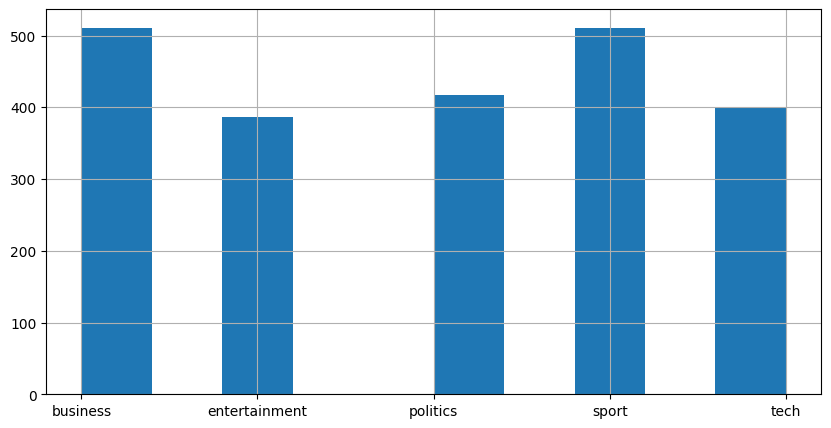

In [24]:
labels.hist(figsize=(10, 5))

In [25]:
# split data
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, test_size=0.2, random_state=42)
print(inputs_train[:5])
print(Ytrain[:5])

1490    Cole refuses to blame van Persie\n\nAshley Col...
2001    Slimmer PlayStation triple sales\n\nSony PlayS...
1572    Bellamy fined after row\n\nNewcastle have fine...
1840    Finding new homes for old phones\n\nRe-using o...
610     Sundance to honour foreign films\n\nInternatio...
Name: text, dtype: object
1490            sport
2001             tech
1572            sport
1840             tech
610     entertainment
Name: labels, dtype: object


In [26]:
vectorizer = CountVectorizer()

In [27]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
print(Xtrain.shape)

(1780, 26762)


In [28]:
Xtrain

<1780x26762 sparse matrix of type '<class 'numpy.int64'>'
	with 358989 stored elements in Compressed Sparse Row format>

In [29]:
Xtrain.toarray() # sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [30]:
(Xtrain != 0).sum()

358989

In [31]:
# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

0.007536029201223603

# Count vectorise the entire training data and count how many times each token show up in th entire data set

In [33]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(inputs)
print(len(vectorizer.get_feature_names_out()))

29421


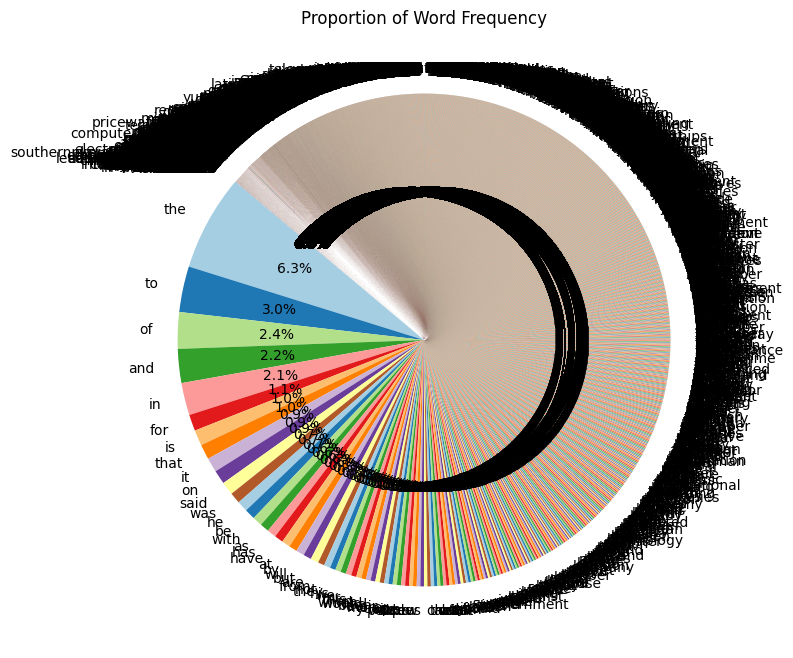

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# plot it on a chart
word_counts = X.sum(axis=0).A1  # Flatten the sparse matrix
words = vectorizer.get_feature_names_out()

# Create a DataFrame for plotting
df = pd.DataFrame({'Word': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Word'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Word Frequency')
plt.show()



Track the experiments

In [ ]:
exp = []

In [ ]:
# Lets see how it this naive_bayes model -> MultinomialNB work on the data without augmentation

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

test1 = {
    "name": "MultinomialNB",
    "train":model.score(Xtrain, Ytrain),
    "test":model.score(Xtest, Ytest)
}
exp.append(test1)
print(test1)

{'name': 'MultinomialNB', 'train': 0.9943820224719101, 'test': 0.9730337078651685}


In [ ]:
# using stop words in  (stop words like a, is... etc words that hold litle meaning)
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

test2 = {
    "name": "MultinomialNB_stop_words",
    "train":model.score(Xtrain, Ytrain),
    "test":model.score(Xtest, Ytest)
}
exp.append(test2)
print(test2)

{'name': 'MultinomialNB_stop_words', 'train': 0.9960674157303371, 'test': 0.9730337078651685}


In [ ]:
# test lemmatizer on an exemple
lemmatizer = WordNetLemmatizer()
test = lemmatizer.lemmatize(inputs_train.iloc[0], pos=wordnet.VERB)
print(test)

Cole refuses to blame van Persie

Ashley Cole has refused to blame Robin van Persie for leaving Arsenal with no fully-fit strikers for the FA Cup fifth round replay at Sheffield United.

Van Persie is suspended alongside Dennis Bergkamp and Jose Antonio Reyes after being sent off at Southampton when Arsenal had a numerical advantage. Thierry Henry is ruled out with an Achilles tendon injury but Cole said: "No-one is putting the blame on Robin. "It's just something that happens on the spur of the moment." Cole added: "I've done it before and I hope they didn't blame me for anything. "Of course he'll learn. I've been sent off a couple of times now and it's just one of those things when you go a bit crazy for one or two seconds. Freddie Ljungberg is likely to be used in an emergency striking role and will be partnered by either Arturo Lupoli, Quincy Owusu-Abeyie or Jeremie Aliadiere. Gunners boss Arsene Wenger said: "Freddie is an option but we need a second striker. "I have to decide whe

In [ ]:
# next we use Lemmatizer, as an external library to augment the data down to its root words.
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [ ]:
# check it with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

test3 = {
    "name": "MultinomialNB_LemmaTokenizer",
    "train":model.score(Xtrain, Ytrain),
    "test":model.score(Xtest, Ytest)
}
exp.append(test3)
print(test3)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'name': 'MultinomialNB_LemmaTokenizer', 'train': 0.9932584269662922, 'test': 0.9730337078651685}


In [ ]:
# try stemming
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [ ]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

test4 = {
    "name": "MultinomialNB_StemTokenizer",
    "train":model.score(Xtrain, Ytrain),
    "test":model.score(Xtest, Ytest)
}
exp.append(test4)
print(test4)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'name': 'MultinomialNB_StemTokenizer', 'train': 0.9921348314606742, 'test': 0.9730337078651685}


In [ ]:
# simple split tokenizer
def split_tokenizer(doc):
  return doc.split()

In [ ]:
vectorizer = CountVectorizer(tokenizer=split_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model = MultinomialNB()
model.fit(Xtrain, Ytrain)

test5 = {
    "name": "MultinomialNB_SimpleSplit",
    "train":model.score(Xtrain, Ytrain),
    "test":model.score(Xtest, Ytest)
}
exp.append(test5)
print(test5)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'name': 'MultinomialNB_SimpleSplit', 'train': 0.9977528089887641, 'test': 0.9595505617977528}


<Axes: xlabel='name'>

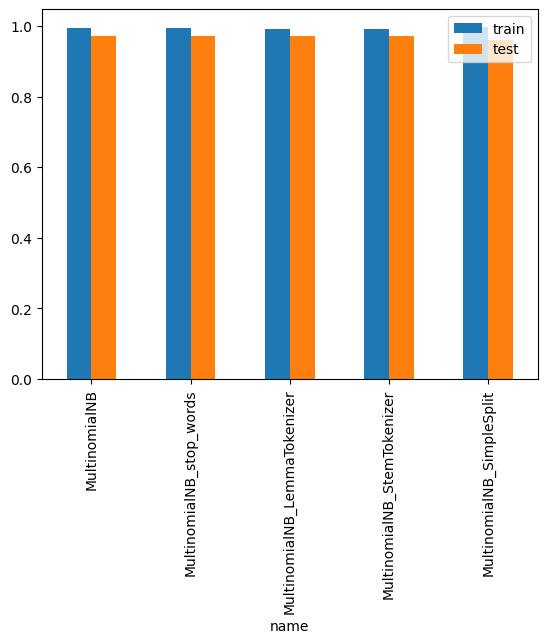

In [ ]:
# Now compait the test performance for all experimant on 1 chart
df_exp = pd.DataFrame(exp)
df_exp.plot.bar(x='name')
